# Scale-free network

The feature is that minority is connected to majority. Here the degree distribution of a scale-free network follows a power-law, $P(k) \propto k^{-\gamma}$. 

Barab&#225;si-Albert (BA) model (1999) is one of several proposed models generating scale-free networks. In the BA model, there are two important general concepts: 

- growth 
- preferential attachment

The specific algorithm of the BA model is as follows;

1. Start with $m_0$ nodes
2. Add a node with $m$ edges into the network. Here the probability that a new edge is connected to the exist node $i$ is given by 
    $$ \Pi(k_i)=\frac{k_i}{\sum_{j=1}^{N^\prime}k_j}$$
    Namely, the probability is proportional to the number of degree of each node, which is called *preferential attachment*. 
3. Repeat the second process until the number of nodes reaches to $N$. 

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

## Use the implemented function

Graph with 100 nodes and 384 edges


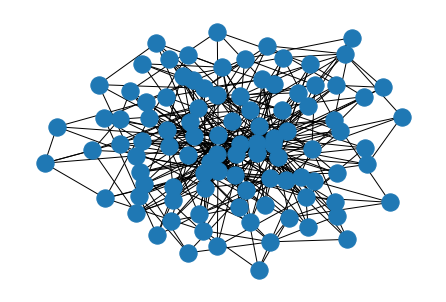

In [3]:
n = 100
m = 4 

G_BA_networkx = nx.barabasi_albert_graph(n, m)
print(nx.info(G_BA_networkx))
nx.draw(G_BA_networkx)
plt.show()

## Self-coding BA model

Graph with 100 nodes and 384 edges


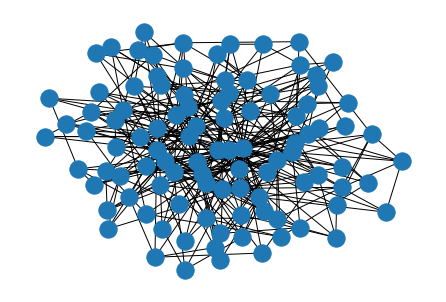

In [5]:
# self-coding 
def gen_BA_network(n, m, seed=None):

    if seed is not None:
        np.random.seed(seed=seed)
    
    m0 = m # initial nodes
    G = nx.cycle_graph(m0)
    initial_edge = list(G.edges())
    node_list = list(range(m0))

    # Add node and edge
    for ind in range(m0, n):
        darray = np.array(G.degree())[:,1] # array of degree

        for jnd in range(m):
            # generate a probability proportional to a degree
            degree_sum = np.sum(darray)
            parray = darray / degree_sum

            # Choose a node 
            new = np.random.choice(node_list, p=parray)
            G.add_edge(ind, new)

            darray[new] = 0
        
        node_list.append(ind)

    G.remove_edges_from(initial_edge)    
    
    return G

n = 100
m = 4

G_BA_self = gen_BA_network(n, m)
print(nx.info(G_BA_self))
nx.draw(G_BA_self)
plt.show()

## Comparison of degree distributions

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 37, 38, 39, 40, 41, 43, 45, 46, 48, 49, 50, 52, 54, 58, 60, 64, 71, 88, 92, 100, 106, 112, 115, 176]
[0.3255, 0.1875, 0.1285, 0.084, 0.061, 0.0365, 0.0295, 0.022, 0.0195, 0.013, 0.0145, 0.0055, 0.0055, 0.007, 0.0035, 0.006, 0.004, 0.003, 0.003, 0.0035, 0.002, 0.0015, 0.002, 0.0045, 0.002, 0.0015, 0.001, 0.0015, 0.0015, 0.001, 0.0005, 0.0015, 0.0005, 0.0015, 0.001, 0.0005, 0.002, 0.0005, 0.0005, 0.0015, 0.001, 0.001, 0.0005, 0.0005, 0.0005, 0.001, 0.0005, 0.001, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005]


Text(0, 0.5, '$p(k)$')

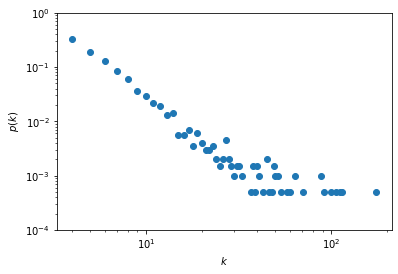

In [7]:
n = 2000
m = 4

G = nx.barabasi_albert_graph(n, m)

k = [ind for ind, x in enumerate(nx.degree_histogram(G)) if x != 0]
degree_dist = [ind/n for ind in nx.degree_histogram(G) if ind != 0]

print(k)
print(degree_dist)

plt.xscale('log')
plt.yscale('log')
plt.ylim(0.0001, 1)
plt.scatter(k, degree_dist)
plt.xlabel('$k$')
plt.ylabel('$p(k)$')